# <center>CAPSTONE PROJECT<center>

In this notebook the data obtained from [Kaggle](https://www.kaggle.com/datasets/imetomi/eur-usd-forex-pair-historical-data-2002-2019) will ba preprocessed and analyzed. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

Let's load the hourly data take a look at it:

In [2]:
df = pd.read_csv("data\eurusd_hour.csv")
df.head()

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.2852,1.2852,1.2840,1.2844,-0.0008,1.2854,1.2854,1.2842,1.2846,-0.0008
1,2005-05-02,01:00,1.2844,1.2848,1.2839,1.2842,-0.0002,1.2846,1.2850,1.2841,1.2844,-0.0002
2,2005-05-02,02:00,1.2843,1.2854,1.2841,1.2851,0.0008,1.2845,1.2856,1.2843,1.2853,0.0008
3,2005-05-02,03:00,1.2851,1.2859,1.2850,1.2851,0.0000,1.2853,1.2861,1.2852,1.2853,0.0000
4,2005-05-02,04:00,1.2852,1.2859,1.2849,1.2855,0.0003,1.2854,1.2861,1.2851,1.2857,0.0003


The discription the columns is as follows:
- Date: Date

- Time: Hour in which the price was measured.

- BO: Opening bid price.

- BH: Highest bid price in that one hour period.

- BL: Lowest bid price in that one hour period.

- BC: Closing bid price.

- BCh: Change between open and close price.

- AO: Opening ask price.

- AH: Highest ask price in that one hour period.

- AL: Lowest ask price in that one hour period.

In [3]:
# Display information about the DataFrame object 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93084 entries, 0 to 93083
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93084 non-null  object 
 1   Time    93084 non-null  object 
 2   BO      93084 non-null  float64
 3   BH      93084 non-null  float64
 4   BL      93084 non-null  float64
 5   BC      93084 non-null  float64
 6   BCh     93084 non-null  float64
 7   AO      93084 non-null  float64
 8   AH      93084 non-null  float64
 9   AL      93084 non-null  float64
 10  AC      93084 non-null  float64
 11  ACh     93084 non-null  float64
dtypes: float64(10), object(2)
memory usage: 8.5+ MB


In [4]:
# Descriptive Statistics
print("Descriptive Statistics:")
df.describe().T

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
BO,93084.0,1.265734e+00,0.126894,1.03553,1.139878,1.274100,1.357615,1.60131
BH,93084.0,1.266755e+00,0.127060,1.03697,1.140728,1.275315,1.358770,1.60384
BL,93084.0,1.264736e+00,0.126722,1.03395,1.139130,1.272955,1.356533,1.59920
BC,93084.0,1.265733e+00,0.126892,1.03555,1.139880,1.274105,1.357630,1.60139
BCh,93084.0,-8.928495e-07,0.001544,-0.02505,-0.000600,0.000010,0.000600,0.03022
AO,93084.0,1.265900e+00,0.126891,1.03566,1.140050,1.274280,1.357770,1.60140
AH,93084.0,1.266917e+00,0.127053,1.03710,1.140890,1.275490,1.358920,1.60393
AL,93084.0,1.264897e+00,0.126715,1.03409,1.139300,1.273150,1.356673,1.59929
AC,93084.0,1.265899e+00,0.126891,1.03568,1.140048,1.274290,1.357770,1.60148
ACh,93084.0,-1.009948e-06,0.001546,-0.02495,-0.000590,0.000000,0.000600,0.03043


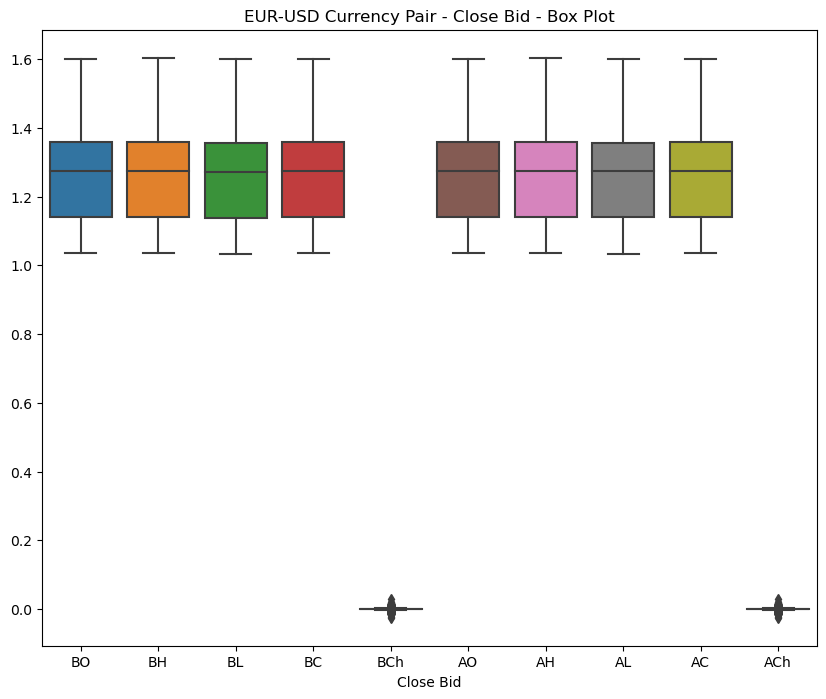

In [5]:
plt.figure(figsize=(10, 8))
sns.boxplot(df)
plt.xlabel('Close Bid')
plt.title('EUR-USD Currency Pair - Close Bid - Box Plot')
plt.show()

From the boxplots, it can be observed that mostly the features have normal distributions. LEt's check the histograms:

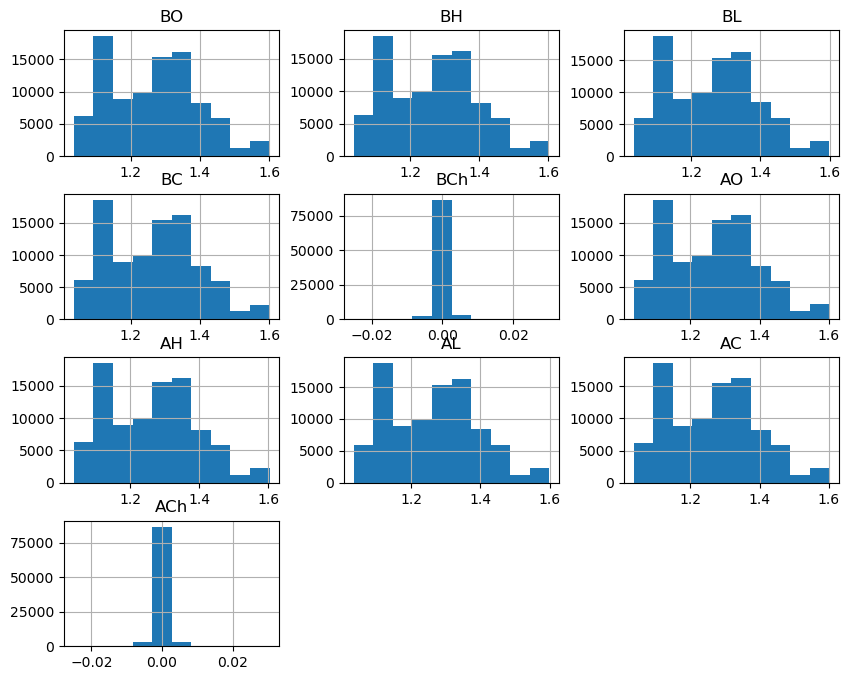

In [6]:
# Histograms
df.hist(figsize=(10, 8))
plt.show()

The same can be derived from the hitograms.

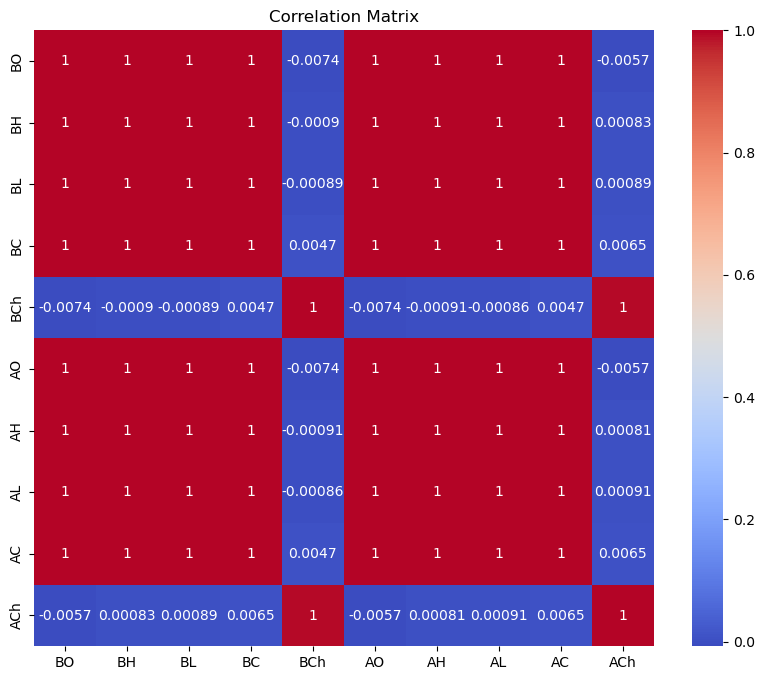

In [7]:
# Correlation matrix or heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

AS can be expected, the features are highly correlated since they are basically the ask and bid prices. The target column for our modelling would be the closing bid price. This is arbitrary since other prices such as asking prices or average og the high and low could also be considered.

Let's check the correlation of the features with the target column.

In [8]:
# Feature Relationships (example for correlation with 'Close_bid')
correlation_with_close_bid = df.corr(numeric_only=True)['BC'].sort_values(ascending=False)
print("Correlation with Close Bid:\n", correlation_with_close_bid)

Correlation with Close Bid:
 BC     1.000000
AC     0.999999
BL     0.999960
AL     0.999960
BH     0.999959
AH     0.999958
BO     0.999926
AO     0.999926
ACh    0.006451
BCh    0.004729
Name: BC, dtype: float64


Based on the results, the closing bid price could be used for univariate time series modelling part. For the multivariate part, some indicators would be derived and fed into the model.

### Combining Date and Time columns

The `Date` and `Time` columns will be combined and converted to datetime format and placed as the index.

Later these columns will be dropped.

In [9]:
# Combine 'Date' and 'Time' columns and convert them to datetime format
df.index = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y-%m-%d %H:%M')

# Format the index to display as 'YYYY-MM-DD HH:MM'
#df.index = df.index.strftime('%Y-%m-%d %H:%M')

In [10]:
# Drop the 'Date' and 'Time' columns from the DataFrame
df.drop(columns=['Date', 'Time'], inplace=True)

In [11]:
# Check
df.head()

,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
2005-05-02 00:00:00,1.2852,1.2852,1.2840,1.2844,-0.0008,1.2854,1.2854,1.2842,1.2846,-0.0008
2005-05-02 01:00:00,1.2844,1.2848,1.2839,1.2842,-0.0002,1.2846,1.2850,1.2841,1.2844,-0.0002
2005-05-02 02:00:00,1.2843,1.2854,1.2841,1.2851,0.0008,1.2845,1.2856,1.2843,1.2853,0.0008
2005-05-02 03:00:00,1.2851,1.2859,1.2850,1.2851,0.0000,1.2853,1.2861,1.2852,1.2853,0.0000
2005-05-02 04:00:00,1.2852,1.2859,1.2849,1.2855,0.0003,1.2854,1.2861,1.2851,1.2857,0.0003


Time range of the dataframe:

In [12]:
first_day = df.index.min()
last_day = df.index.max()
print("First time stamp of the dataframe:", first_day)
print("Last time stamp of the dataframe:", last_day)

First time stamp of the dataframe: 2005-05-02 00:00:00
Last time stamp of the dataframe: 2020-04-29 22:00:00


### Handling missing values and dates 

First, we will check if there are any dates missing from our index of if we have a record for each day between the first and last row. We can construct the full date range between our first and last observation date and see the difference with our index:

In [13]:
# Generate a date range with hourly frequency between 'first_day' and 'last_day'
full_range = pd.date_range(first_day, last_day, freq='H')

# Get the number of elements in the date range
full_range.shape[0]

131447

In [14]:
# Find the differences between 'full_range' and the index of DataFrame 'df'
differences = full_range.difference(df.index)

# Get the shape (number of elements) of the 'differences' array
differences.shape


(38363,)

In [15]:
# Get the day names for the missing timestamps in 'differences'
day_names_missed = differences.day_name()

# Count the occurrences of each day name in 'day_names_missed'
day_names_missed.value_counts()

Saturday     18768
Sunday       16714
Friday        2215
Tuesday        185
Wednesday      170
Monday         169
Thursday       142
Name: count, dtype: int64

In [16]:
day_names_total = df.index.day_name()
day_names_total.value_counts()

Thursday     18626
Monday       18623
Wednesday    18621
Tuesday      18607
Friday       16553
Sunday        2054
Name: count, dtype: int64

From the above, it can be seen that 2215 timestamps are missing on Fridays. Also, 2054 timestamps exist on Sundays. Since the Forex data is 5 days per week from Monday to Friday, all the Saturdays and Sundays should be missing in the df. However, it seems that a lot of data is missing on Fridays and a lot of data is available on Sundays. This would mean that the data from Fridays may have been misplaced to the coming Sundays. This will be investigated to make sure that most of the available data can be retrieved.

In [17]:
# Get the missed days by name
day_names_missed = differences.day_name()

# Get the df days by name
day_names_df = df.index.day_name()

# Define the order of the day names
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert day names to categorical type with the specified ordering
day_names_missed = day_names_missed.astype(pd.CategoricalDtype(categories=day_order, ordered=True))
day_names_df = day_names_df.astype(pd.CategoricalDtype(categories=day_order, ordered=True))

# Count the occurrences of each day name in 'day_names_missed' and 'day_names_total'
missed_counts = day_names_missed.value_counts().sort_index()
df_counts = day_names_df.value_counts().sort_index()

In [18]:
# check
missed_counts

Monday         169
Tuesday        185
Wednesday      170
Thursday       142
Friday        2215
Saturday     18768
Sunday       16714
Name: count, dtype: int64

In [19]:
# Check
df_counts

Monday       18623
Tuesday      18607
Wednesday    18621
Thursday     18626
Friday       16553
Saturday         0
Sunday        2054
Name: count, dtype: int64

In [20]:
# Making a dataframe to compare the missing values for each day and their ratio
days_compare = pd.DataFrame({'Data': df_counts, 'Missed': missed_counts, 'Ratio': np.round(missed_counts/df.shape[0],3)})
days_compare

,Data,Missed,Ratio
Monday,18623,169,0.002
Tuesday,18607,185,0.002
Wednesday,18621,170,0.002
Thursday,18626,142,0.002
Friday,16553,2215,0.024
Saturday,0,18768,0.202
Sunday,2054,16714,0.180


Let's show the number of available and missing values in a bar plot.

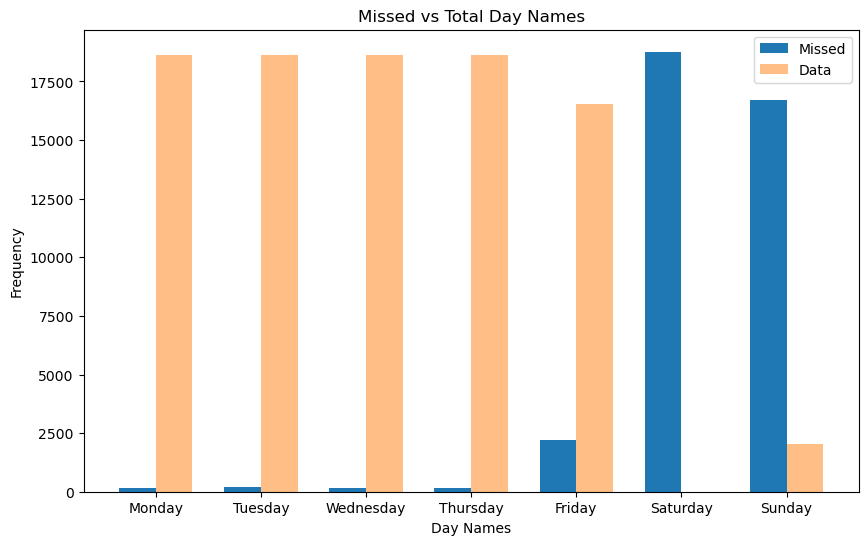

In [21]:
# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(day_order))

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(10,6))

# Plot the 'missed' bars
ax.bar(x - bar_width/2, missed_counts, bar_width, label='Missed')

# Plot the 'total' bars
ax.bar(x + bar_width/2, df_counts, bar_width, label='Data', alpha=0.5)

# Set the labels and title
ax.set_xlabel('Day Names')
ax.set_ylabel('Frequency')
ax.set_title('Missed vs Total Day Names')

# Set the x-axis tick labels and positions
ax.set_xticks(x)
ax.set_xticklabels(day_order)

# Add a legend
ax.legend()

# Display the plot
plt.show()
plt.show()

As can be seen, there are a few missing values on Mondays, Tuesdays, Wednesdays, and Thursdays. But, there are considerable number of missing values on Fridays. At the same time, there are considerable number of available values on Sundays. It is expected that all the data on Saturdays and Sundays would be missing because of the nature of the Forex market.  

Let's try to find out if the data from Fridays has been misplaced on Sundays or not.

In [22]:
# Define the order of the day names
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert day names to categorical type with the specified ordering
day_names_df = day_names_df.astype(pd.CategoricalDtype(categories=day_order, ordered=True))

# Filter the data for Sundays
sunday_data = df[day_names_df == 'Sunday']

sunday_data

,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
2005-05-08 21:00:00,1.28125,1.28140,1.28100,1.28110,-0.00015,1.28225,1.28240,1.28200,1.28210,-0.00015
2005-05-08 22:00:00,1.28100,1.28140,1.28090,1.28110,0.00010,1.28200,1.28240,1.28190,1.28210,0.00010
2005-05-08 23:00:00,1.28115,1.28180,1.28090,1.28100,-0.00015,1.28215,1.28280,1.28190,1.28200,-0.00015
2005-05-15 21:00:00,1.26250,1.26250,1.26165,1.26205,-0.00045,1.26350,1.26350,1.26265,1.26305,-0.00045
2005-05-15 22:00:00,1.26205,1.26210,1.25895,1.25955,-0.00250,1.26305,1.26310,1.25995,1.26055,-0.00250
...,...,...,...,...,...,...,...,...,...,...
2020-04-19 22:00:00,1.08705,1.08712,1.08635,1.08671,-0.00034,1.08805,1.08805,1.08659,1.08689,-0.00116
2020-04-19 23:00:00,1.08671,1.08702,1.08627,1.08630,-0.00041,1.08686,1.08722,1.08646,1.08648,-0.00038
2020-04-26 21:00:00,1.08208,1.08212,1.08172,1.08206,-0.00002,1.08248,1.08294,1.08223,1.08245,-0.00003
2020-04-26 22:00:00,1.08208,1.08212,1.08134,1.08161,-0.00047,1.08237,1.08247,1.08157,1.08183,-0.00054


In [23]:
# Filter the missing Fridays
missing_fridays = differences[differences.day_name() == 'Friday']

missing_fridays

DatetimeIndex(['2005-05-06 21:00:00', '2005-05-06 22:00:00',
               '2005-05-06 23:00:00', '2005-05-13 21:00:00',
               '2005-05-13 22:00:00', '2005-05-13 23:00:00',
               '2005-05-20 21:00:00', '2005-05-20 22:00:00',
               '2005-05-20 23:00:00', '2005-05-27 21:00:00',
               ...
               '2020-04-03 23:00:00', '2020-04-10 21:00:00',
               '2020-04-10 22:00:00', '2020-04-10 23:00:00',
               '2020-04-17 21:00:00', '2020-04-17 22:00:00',
               '2020-04-17 23:00:00', '2020-04-24 21:00:00',
               '2020-04-24 22:00:00', '2020-04-24 23:00:00'],
              dtype='datetime64[ns]', length=2215, freq=None)

Now, the Fridays will be compared with Sundays to see if the Sunday data  is two days after the Friday at the exact time (hour). If yes, the counter will be updated.

In [24]:
# Filter the missing Fridays
missing_fridays = differences[differences.day_name() == 'Friday']

# Initialize a counter for exact hours on Sunday
exact_hours_count = 0
fridays_replaced = []
sundays_misplaced = []

# Iterate over the missing Fridays and compare with the corresponding Sundays
for friday_date in missing_fridays:
    sunday_date = (friday_date + pd.DateOffset(days=2))
    if sunday_date in sunday_data.index:        
        exact_hours_count += 1
        fridays_replaced.append(friday_date)
        sundays_misplaced.append(sunday_date)

# Print the count of missing Fridays with exact hours on Sunday
print("Number of missing Fridays with exact hours on Sunday:", exact_hours_count)

Number of missing Fridays with exact hours on Sunday: 2039


In [25]:
# Create a copy of the dataframe to fill in the Friday values with the Sunday values 
df_n=df.copy()

In [26]:
for sunday_date, friday_date in zip(sundays_misplaced, fridays_replaced):
    df_n.loc[friday_date] = df_n.loc[sunday_date].values

# Sort the DataFrame by index
df_n.sort_index(inplace=True)

# Print the updated DataFrame
df_n.head(25)


,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
2005-05-02 00:00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
2005-05-02 01:00:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2005-05-02 02:00:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
2005-05-02 03:00:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
2005-05-02 04:00:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
2005-05-02 05:00:00,1.28540,1.28580,1.28530,1.28540,0.00000,1.28560,1.28600,1.28550,1.28560,0.00000
2005-05-02 06:00:00,1.28540,1.28600,1.28520,1.28585,0.00045,1.28560,1.28620,1.28540,1.28600,0.00040
2005-05-02 07:00:00,1.28585,1.28605,1.28515,1.28555,-0.00030,1.28600,1.28620,1.28530,1.28570,-0.00030
2005-05-02 08:00:00,1.28555,1.28675,1.28555,1.28640,0.00085,1.28570,1.28690,1.28570,1.28655,0.00085
2005-05-02 09:00:00,1.28640,1.28680,1.28620,1.28680,0.00040,1.28655,1.28695,1.28635,1.28695,0.00040


In [27]:
differences_n = full_range.difference(df_n.index)
differences_n.shape
print("Number of missing time stamps in the original dataframe:", differences.shape[0],
      "\nNumber of missing time stamps in the updated dataframe:", differences_n.shape[0],
      "\nNumber of missing dates filled:", differences.shape[0] - differences_n.shape[0])

Number of missing time stamps in the original dataframe: 38363 
Number of missing time stamps in the updated dataframe: 36324 
Number of missing dates filled: 2039


In [28]:
# Let's get the value counts of the updated missing values
day_names_missed_n = differences_n.day_name()
day_names_missed_n.value_counts()

Saturday     18768
Sunday       16714
Tuesday        185
Friday         176
Wednesday      170
Monday         169
Thursday       142
Name: count, dtype: int64

Let's order the day names.

In [29]:
# Get the day names of the missing dates
day_names_missed_n = differences_n.day_name()

# Get the day names of the df_n
day_names_df_n = df_n.index.day_name()

# Define the order of the day names
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert day names to categorical type with the specified ordering
day_names_missed_n = day_names_missed_n.astype(pd.CategoricalDtype(categories=day_order, ordered=True))
day_names_df_n = day_names_df_n.astype(pd.CategoricalDtype(categories=day_order, ordered=True))

# Count the occurrences of each day name in 'day_names_missed' and 'day_names_total'
missed_counts_n = day_names_missed_n.value_counts().sort_index()
df_n_counts = day_names_df_n.value_counts().sort_index()

In [30]:
missed_counts_n

Monday         169
Tuesday        185
Wednesday      170
Thursday       142
Friday         176
Saturday     18768
Sunday       16714
Name: count, dtype: int64

In [31]:
# Making a dataframe to compare the missing values for each day and their ratio for the updated dataframe
days_compare_n = pd.DataFrame({'Data': df_n_counts, 'Missed': missed_counts_n, 'Ratio': np.round(missed_counts_n/df_n.shape[0],3)})
days_compare_n

,Data,Missed,Ratio
Monday,18623,169,0.002
Tuesday,18607,185,0.002
Wednesday,18621,170,0.002
Thursday,18626,142,0.001
Friday,18592,176,0.002
Saturday,0,18768,0.197
Sunday,2054,16714,0.176


Let's show the number of available and missing values of the updated dataframe in a bar plot.

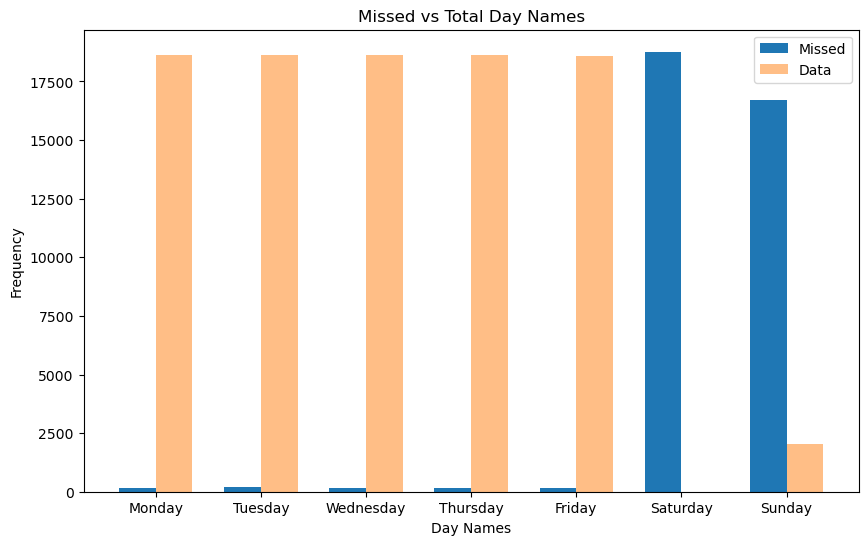

In [32]:
# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(day_order))

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(10,6))

# Plot the 'missed' bars
ax.bar(x - bar_width/2, missed_counts_n, bar_width, label='Missed')

# Plot the 'total' bars
ax.bar(x + bar_width/2, df_n_counts, bar_width, label='Data', alpha=0.5)

# Set the labels and title
ax.set_xlabel('Day Names')
ax.set_ylabel('Frequency')
ax.set_title('Missed vs Total Day Names')

# Set the x-axis tick labels and positions
ax.set_xticks(x)
ax.set_xticklabels(day_order)

# Add a legend
ax.legend()

# Display the plot
plt.show()

As can be seen, the missing values of the Fridays have been filled up with the corresponding Sunday values. 

Next the Saturdays and Sundays will be filled with NaN values. After that, all the NaN values will be filled by forward filling method. This is because all the values in the date range should be existed for the modelling part especially using statistical methods such as ARIMA and SARIMA.

In [33]:
# Create a date range with the hour frequency 
date_range = pd.date_range(start=df_n.index.min(), end=df_n.index.max(), freq='H')

# Create a new DataFrame with the complete date range
df_complete = pd.DataFrame(index=date_range)

# Combine the original data with the complete DataFrame
df_merged = pd.merge(df_complete, df_n, left_index=True, right_index=True, how='left')

# Fill the missing values of Saturdays and Sundays with NaN values
df_merged.loc[df_merged.index.dayofweek.isin([5, 6])] = np.nan

# Extract the updated data for Saturdays and Sundays to check
df_updated_weekends = df_merged.loc[df_merged.index.dayofweek.isin([5, 6])]

In [34]:
# Check the weekend data
df_updated_weekends

,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
2005-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-07 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-07 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-07 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-04-26 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-26 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-26 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-26 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Get the nan indices
nan_indices = df_merged[df_merged.isna().any(axis=1)].index
nan_indices

DatetimeIndex(['2005-05-07 00:00:00', '2005-05-07 01:00:00',
               '2005-05-07 02:00:00', '2005-05-07 03:00:00',
               '2005-05-07 04:00:00', '2005-05-07 05:00:00',
               '2005-05-07 06:00:00', '2005-05-07 07:00:00',
               '2005-05-07 08:00:00', '2005-05-07 09:00:00',
               ...
               '2020-04-26 14:00:00', '2020-04-26 15:00:00',
               '2020-04-26 16:00:00', '2020-04-26 17:00:00',
               '2020-04-26 18:00:00', '2020-04-26 19:00:00',
               '2020-04-26 20:00:00', '2020-04-26 21:00:00',
               '2020-04-26 22:00:00', '2020-04-26 23:00:00'],
              dtype='datetime64[ns]', length=38378, freq=None)

In [36]:
# Get the NaN counts for each day
nan_counts = df_merged.loc[nan_indices].index.day_name().value_counts()
nan_counts

Saturday     18768
Sunday       18768
Tuesday        185
Friday         176
Wednesday      170
Monday         169
Thursday       142
Name: count, dtype: int64

As can be seen, all the weekend dates have been filled with NaN values. Next, all the NaN values will be filled by forward filling approach.

In [37]:
# Filling NaN values by ffill approach and store the complete dataframe into df_comp
df_comp = df_merged.fillna(method='ffill')

In [38]:
# Check the NaN values
df.isna().sum()

BO     0
BH     0
BL     0
BC     0
BCh    0
AO     0
AH     0
AL     0
AC     0
ACh    0
dtype: int64

In [39]:
# Recheck with the index method
nan_indices_n = df_comp[df_comp.isna().any(axis=1)].index
nan_counts_n = df_comp.loc[nan_indices_n].index.dayofweek.value_counts()
nan_counts_n

Series([], Name: count, dtype: int64)

Now that the cleaning process in finished and the compelete dataframe is ready for the modelling part, we can save it into a csv file.

In [40]:
# Specify the path and filename for the CSV file
csv_file_path = 'data/EURUSD_HOUR_COMPLETE.csv'

# Save the DataFrame to CSV
df_comp.to_csv(csv_file_path)